In [3]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from absl import app
from absl import flags

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
import tensorflow_lattice as tfl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Import helpers
import import_ipynb
from common import buildDatasetForLattice
from common import scaleVolume
from common import extractLatticeWeights
from common import dropColumns
from common import filterBad
from common import splitDataset
from common import normDataset
from common import evaluatePerf
from common import evaluateCustom
from common import extractXGWeights

importing Jupyter notebook from common.ipynb


In [5]:
dataset, columns = buildDatasetForLattice()
dataset = filterBad(dataset)
train_dataset, test_dataset, train_labels, test_labels = splitDataset(dataset, 0.2)
train_stats = train_dataset.describe().transpose()

Rejected 2017073 points (18.505442%)


In [6]:
preprocessed_dataset = dataset.copy()
col = preprocessed_dataset.first_val
preprocessed_dataset.first_val = np.log(col + 1)

In [9]:
input_cols = preprocessed_dataset.columns[:-1]

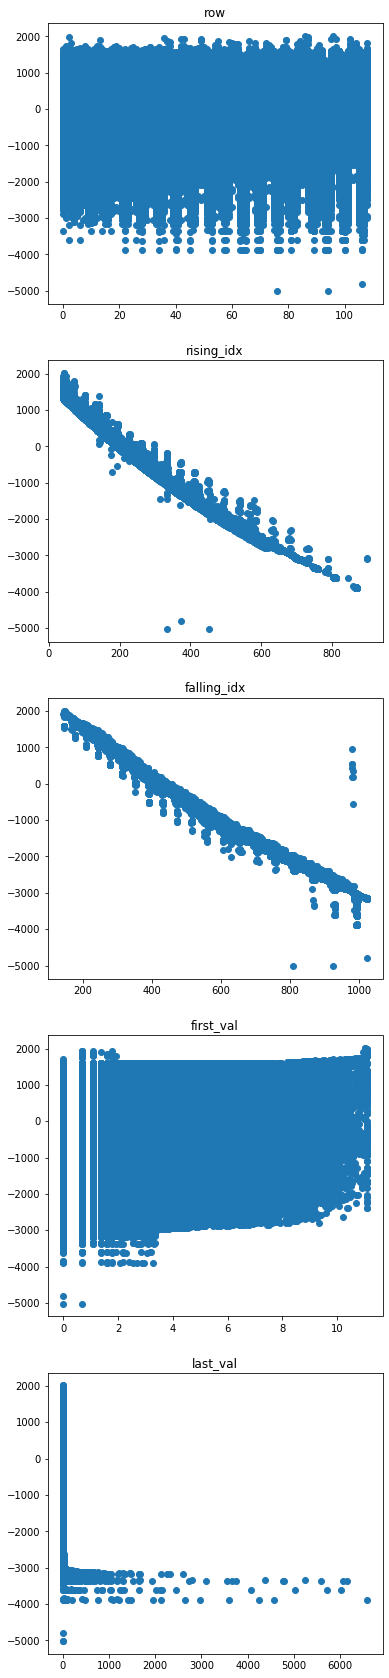

In [26]:
f, axs = plt.subplots(len(input_cols), 1, figsize=(6, 6 * len(input_cols)))
size = 200000
for ax, input_col in zip(axs, input_cols):
#     ax = plt.subplot(len(input_cols), 1, i+1, title=input_col)
    ax.set_title(input_col)
    ax.scatter(preprocessed_dataset[input_col].values[:size], dataset.delay.values[:size])

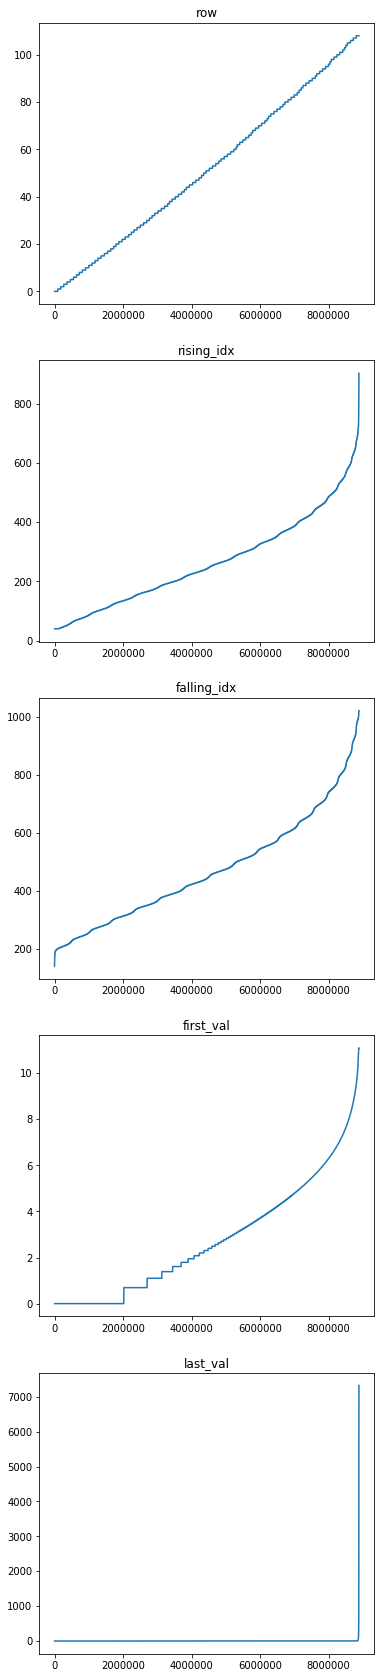

In [28]:
f, axs = plt.subplots(len(input_cols), 1, figsize=(6, 6 * len(input_cols)))
for ax, input_col in zip(axs, input_cols):
    ax.set_title(input_col)
    ax.plot(preprocessed_dataset[input_col].sort_values().values)

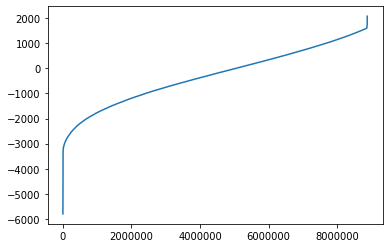

In [8]:
plt.plot(preprocessed_dataset.delay.sort_values().values)